In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ktrain

In [ ]:
!pip install tf_keras

In [ ]:
import pandas as pd
import numpy as np
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import ktrain
from ktrain import text

In [ ]:
tamil_stopwords = set([
    "அங்கு", "அங்கே", "அடுத்த", "அதற்கு", "அதனால்", "அதன்", "அதிக", "அதில்", "அது",
    "அதே", "அதை", "அந்த", "அந்தக்", "அந்தப்", "அல்லது", "அவரது", "அவர்", "அவர்கள்",
    "அவள்", "அவன்", "அவை", "அன்று", "ஆகிய", "ஆகியோர்", "ஆகும்", "ஆனால்", "இங்கு",
    "இங்கே", "இடத்தில்", "இடம்", "இதற்கு", "இதனால்", "இதனை", "இதன்", "இதில்", "இது",
    "இதை", "இந்த", "இந்தக்", "இந்தத்", "இந்தப்", "இப்போது", "இரு", "இருக்கும்", "இருந்த",
    "இருந்தது", "இருந்து", "இல்லை", "இவர்", "இவை", "இன்னும்", "உள்ள", "உள்ளது", "உள்ளன",
    "உன்", "எந்த", "எல்லாம்", "என", "எனக்", "எனக்கு", "எனப்படும்", "எனவும்", "எனவே",
    "எனினும்", "எனும்", "என்", "என்பது", "என்பதை", "என்ற", "என்று", "என்றும்", "என்ன",
    "என்னும்", "ஏன்", "ஒரு", "ஒரே", "ஓர்", "கொண்ட", "கொண்டு", "கொள்ள", "சற்று", "சில",
    "சிறு", "சேர்ந்த", "தவிர", "தனது", "தன்", "தான்", "நாம்", "நான்", "நீ", "பல",
    "பலரும்", "பல்வேறு", "பற்றி", "பற்றிய", "பிற", "பிறகு", "பின்", "பின்னர்", "பெரும்",
    "பேர்", "போது", "போல", "போல்", "போன்ற", "மட்டுமே", "மட்டும்", "மற்ற", "மற்றும்",
    "மிக", "மிகவும்", "மீது", "முதல்", "முறை", "மேலும்", "மேல்", "யார்", "வந்த",
    "வந்து", "வரும்", "வரை", "வரையில்", "விட", "விட்டு", "வேண்டும்", "வேறு"
])

In [ ]:
import re
import string

def preprocess_tamil_english_text(text):
    text = re.sub(r'[^a-zA-Zஅஆஇஈஉஊஎஏஐஒஓௌகெஙடபணரஎழைசாௗ\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in tamil_stopwords]
    return " ".join(tokens)

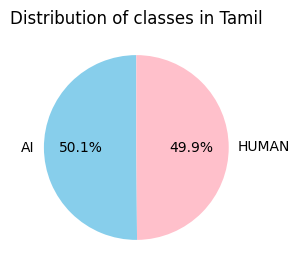

In [ ]:
import matplotlib.pyplot as plt
train_df = pd.read_csv('/content/drive/MyDrive/AI generated product reviews in Dravidian languages DravidianLangTech@NAACL 2025/Tamil/tam_training_data_hum_ai.csv')
test_df = pd.read_csv('/content/drive/MyDrive/AI generated product reviews in Dravidian languages DravidianLangTech@NAACL 2025/Tamil/tamil-test.csv')

train_text = train_df['DATA']
train_labels = train_df['LABEL']
test_text = test_df['Data']
test_labels = test_df['Label']

# Count label distribution
label_counts = train_labels.value_counts()

# Plot pie chart
plt.figure(figsize=(3, 3))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Distribution of classes in Tamil')
plt.show()

In [ ]:
train_text = [preprocess_tamil_english_text(text) for text in train_text]
# test_text = [preprocess_tamil_english_text(text) for text in test_text]

In [ ]:
train_df['LABEL'].value_counts()

,count
LABEL,
AI,405
HUMAN,403


In [ ]:
test_labels.value_counts()

,count
Label,
HUMAN,52
AI,48


In [ ]:
classes_list = ["HUMAN", "AI"]
train_label = train_labels.apply(classes_list.index)
# test_label = test_labels.apply(classes_list.index)

In [ ]:
from sklearn.model_selection import train_test_split

# Split train data into train and validation sets
train_text, val_text, train_label, val_label = train_test_split(
    train_text, train_labels, test_size=0.2, random_state=42
)

In [ ]:
len(val_label)

162

In [ ]:
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=30, class_names=classes_list)
trn = t.preprocess_train(np.array(train_text), np.array(train_label))
val = t.preprocess_test(np.array(val_text), np.array(val_label))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessing train...
language: ta
train sequence lengths:
	mean : 6
	95percentile : 11
	99percentile : 15


/usr/local/lib/python3.11/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: ta
test sequence lengths:
	mean : 6
	95percentile : 11
	99percentile : 14


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = "AI_Tamil_xlm_roberta"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
learner.fit_onecycle(5e-5, 15, verbose=2, callbacks=callbacks_list)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/15

Epoch 1: val_accuracy improved from -inf to 0.46914, saving model to AI_Tamil_xlm_roberta
21/21 - 143s - loss: 0.6936 - accuracy: 0.4938 - val_loss: 0.6919 - val_accuracy: 0.4691 - 143s/epoch - 7s/step
Epoch 2/15

Epoch 2: val_accuracy improved from 0.46914 to 0.67284, saving model to AI_Tamil_xlm_roberta
21/21 - 80s - loss: 0.6805 - accuracy: 0.5913 - val_loss: 0.6561 - val_accuracy: 0.6728 - 80s/epoch - 4s/step
Epoch 3/15

Epoch 3: val_accuracy improved from 0.67284 to 0.67901, saving model to AI_Tamil_xlm_roberta
21/21 - 77s - loss: 0.6408 - accuracy: 0.6672 - val_loss: 0.5624 - val_accuracy: 0.6790 - 77s/epoch - 4s/step
Epoch 4/15

Epoch 4: val_accuracy improved from 0.67901 to 0.77160, saving model to AI_Tamil_xlm_roberta
21/21 - 94s - loss: 0.5387 - accuracy: 0.7632 - val_loss: 0.5261 - val_accuracy: 0.7716 - 94s/epoch - 4s/step
Epoch 5/15

Epoch 5: val_accuracy improved from 0.77160 to 0.79630, saving mod

In [ ]:
model.load_weights(filepath)

learner.validate(class_names=t.get_classes())

predictor = ktrain.get_predictor(learner.model, preproc=t)

predict = predictor.predict(test_text.values)

6/6 [==============================] - 1s 88ms/step
              precision    recall  f1-score   support

          AI       0.90      0.94      0.92        86
       HUMAN       0.93      0.88      0.91        76

    accuracy                           0.91       162
   macro avg       0.92      0.91      0.91       162
weighted avg       0.91      0.91      0.91       162



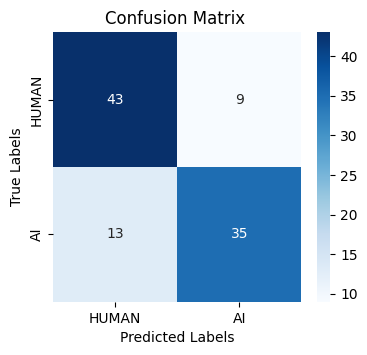

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true_labels = test_labels.values  # Ground truth labels
predictions = predict             # Model predictions

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=['HUMAN', 'AI'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HUMAN', 'AI'], yticklabels=['HUMAN', 'AI'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions, average='macro')
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")


Accuracy: 0.78
F1 Score (Macro): 0.78
Precision (Macro): 0.78
Recall (Macro): 0.78


In [ ]:
MODEL_NAME = 'albert-base-v2'
t = text.Transformer(MODEL_NAME, maxlen=30, class_names=classes_list)
trn = t.preprocess_train(np.array(train_text), np.array(train_label))
val = t.preprocess_test(np.array(val_text), np.array(val_label))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

preprocessing train...
language: ta
train sequence lengths:
	mean : 6
	95percentile : 11
	99percentile : 15


/usr/local/lib/python3.11/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ta
test sequence lengths:
	mean : 6
	95percentile : 11
	99percentile : 14


In [ ]:
filepath = "AI_Tamil_albert"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
learner.fit_onecycle(5e-5, 18, verbose=2, callbacks=callbacks_list)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/18

Epoch 1: val_accuracy improved from -inf to 0.46914, saving model to AI_Tamil_albert
21/21 - 48s - loss: 0.6921 - accuracy: 0.5495 - val_loss: 0.7000 - val_accuracy: 0.4691 - 48s/epoch - 2s/step
Epoch 2/18

Epoch 2: val_accuracy improved from 0.46914 to 0.54938, saving model to AI_Tamil_albert
21/21 - 27s - loss: 0.6930 - accuracy: 0.5124 - val_loss: 0.6708 - val_accuracy: 0.5494 - 27s/epoch - 1s/step
Epoch 3/18

Epoch 3: val_accuracy did not improve from 0.54938
21/21 - 5s - loss: 0.6937 - accuracy: 0.5325 - val_loss: 0.6944 - val_accuracy: 0.4691 - 5s/epoch - 216ms/step
Epoch 4/18

Epoch 4: val_accuracy improved from 0.54938 to 0.69753, saving model to AI_Tamil_albert
21/21 - 26s - loss: 0.6945 - accuracy: 0.4969 - val_loss: 0.6926 - val_accuracy: 0.6975 - 26s/epoch - 1s/step
Epoch 5/18

Epoch 5: val_accuracy did not improve from 0.69753
21/21 - 5s - loss: 0.7005 - accuracy: 0.4768 - val_loss: 0.6903 - val_acc

In [ ]:
model.load_weights(filepath)

learner.validate(class_names=t.get_classes())

predictor = ktrain.get_predictor(learner.model, preproc=t)

predict = predictor.predict(test_text.values)

6/6 [==============================] - 4s 136ms/step
              precision    recall  f1-score   support

          AI       0.65      0.92      0.76        86
       HUMAN       0.83      0.45      0.58        76

    accuracy                           0.70       162
   macro avg       0.74      0.68      0.67       162
weighted avg       0.74      0.70      0.68       162



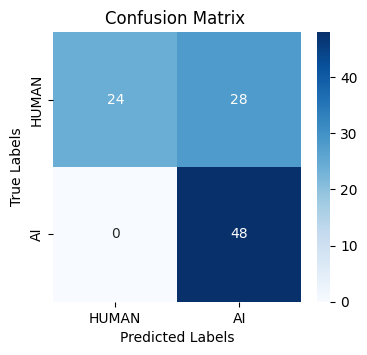

In [ ]:
true_labels = test_labels.values  # Ground truth labels
predictions = predict             # Model predictions

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=['HUMAN', 'AI'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HUMAN', 'AI'], yticklabels=['HUMAN', 'AI'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ')
plt.show()

In [ ]:
accuracy = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions, average='macro')
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")

Accuracy: 0.72
F1 Score (Macro): 0.70
Precision (Macro): 0.82
Recall (Macro): 0.73


In [ ]:
MODEL_NAME = 'google/muril-base-cased'
t = text.Transformer(MODEL_NAME, maxlen=30, class_names=classes_list)
trn = t.preprocess_train(np.array(train_text), np.array(train_label))
val = t.preprocess_test(np.array(val_text), np.array(val_label))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.56G [00:00<?, ?B/s]

preprocessing train...
language: ta
train sequence lengths:
	mean : 6
	95percentile : 11
	99percentile : 15


/usr/local/lib/python3.11/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ta
test sequence lengths:
	mean : 6
	95percentile : 11
	99percentile : 14


In [ ]:
filepath = "AI_Tamil_muril"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
learner.fit_onecycle(5e-5, 15, verbose=2, callbacks=callbacks_list)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/15

Epoch 1: val_accuracy improved from -inf to 0.46914, saving model to AI_Tamil_muril
21/21 - 135s - loss: 0.6930 - accuracy: 0.5062 - val_loss: 0.6927 - val_accuracy: 0.4691 - 135s/epoch - 6s/step
Epoch 2/15

Epoch 2: val_accuracy improved from 0.46914 to 0.77160, saving model to AI_Tamil_muril
21/21 - 123s - loss: 0.6853 - accuracy: 0.7012 - val_loss: 0.6555 - val_accuracy: 0.7716 - 123s/epoch - 6s/step
Epoch 3/15

Epoch 3: val_accuracy did not improve from 0.77160
21/21 - 6s - loss: 0.6318 - accuracy: 0.7601 - val_loss: 0.6159 - val_accuracy: 0.7037 - 6s/epoch - 292ms/step
Epoch 4/15

Epoch 4: val_accuracy improved from 0.77160 to 0.77778, saving model to AI_Tamil_muril
21/21 - 124s - loss: 0.5434 - accuracy: 0.7802 - val_loss: 0.5313 - val_accuracy: 0.7778 - 124s/epoch - 6s/step
Epoch 5/15

Epoch 5: val_accuracy did not improve from 0.77778
21/21 - 6s - loss: 0.4461 - accuracy: 0.8328 - val_loss: 0.5172 - val_

In [ ]:
model.load_weights(filepath)

learner.validate(class_names=t.get_classes())

predictor = ktrain.get_predictor(learner.model, preproc=t)

predict = predictor.predict(test_text.values)

6/6 [==============================] - 4s 188ms/step
              precision    recall  f1-score   support

          AI       0.90      0.91      0.90        86
       HUMAN       0.89      0.88      0.89        76

    accuracy                           0.90       162
   macro avg       0.89      0.89      0.89       162
weighted avg       0.90      0.90      0.90       162



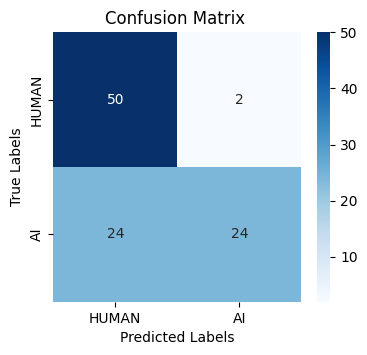

In [ ]:
true_labels = test_labels.values  # Ground truth labels
predictions = predict             # Model predictions

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=['HUMAN', 'AI'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HUMAN', 'AI'], yticklabels=['HUMAN', 'AI'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ')
plt.show()

In [ ]:
accuracy = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions, average='macro')
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")

Accuracy: 0.74
F1 Score (Macro): 0.72
Precision (Macro): 0.80
Recall (Macro): 0.73


In [ ]:
MODEL_NAME = 'bert-base-multilingual-cased'
t = text.Transformer(MODEL_NAME, maxlen=30, class_names=classes_list)
trn = t.preprocess_train(np.array(train_text), np.array(train_label))
val = t.preprocess_test(np.array(val_text), np.array(val_label))
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=32)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

preprocessing train...
language: ta
train sequence lengths:
	mean : 6
	95percentile : 11
	99percentile : 15


/usr/local/lib/python3.11/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ta
test sequence lengths:
	mean : 6
	95percentile : 11
	99percentile : 14


In [ ]:
filepath = "AI_Tamil_mbert"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
learner.fit_onecycle(5e-5, 18, verbose=2, callbacks=callbacks_list)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/18

Epoch 1: val_accuracy improved from -inf to 0.73457, saving model to AI_Tamil_mbert
21/21 - 107s - loss: 0.6109 - accuracy: 0.6780 - val_loss: 0.5699 - val_accuracy: 0.7346 - 107s/epoch - 5s/step
Epoch 2/18

Epoch 2: val_accuracy improved from 0.73457 to 0.82099, saving model to AI_Tamil_mbert
21/21 - 90s - loss: 0.4210 - accuracy: 0.8204 - val_loss: 0.4054 - val_accuracy: 0.8210 - 90s/epoch - 4s/step
Epoch 3/18

Epoch 3: val_accuracy did not improve from 0.82099
21/21 - 6s - loss: 0.3906 - accuracy: 0.8375 - val_loss: 0.3973 - val_accuracy: 0.8210 - 6s/epoch - 267ms/step
Epoch 4/18

Epoch 4: val_accuracy improved from 0.82099 to 0.86420, saving model to AI_Tamil_mbert
21/21 - 102s - loss: 0.2106 - accuracy: 0.9303 - val_loss: 0.5009 - val_accuracy: 0.8642 - 102s/epoch - 5s/step
Epoch 5/18

Epoch 5: val_accuracy did not improve from 0.86420
21/21 - 6s - loss: 0.1481 - accuracy: 0.9536 - val_loss: 0.5751 - val_ac

In [ ]:
model.load_weights(filepath)

learner.validate(class_names=t.get_classes())

predictor = ktrain.get_predictor(learner.model, preproc=t)

predict = predictor.predict(test_text.values)

6/6 [==============================] - 8s 198ms/step
              precision    recall  f1-score   support

          AI       0.92      0.85      0.88        86
       HUMAN       0.84      0.92      0.88        76

    accuracy                           0.88       162
   macro avg       0.88      0.88      0.88       162
weighted avg       0.89      0.88      0.88       162



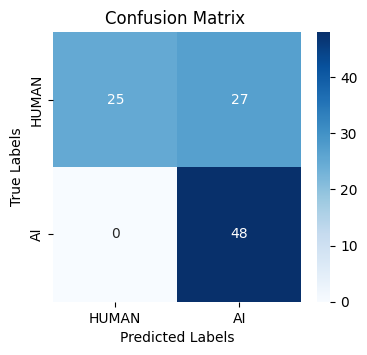

In [ ]:
true_labels = test_labels.values  # Ground truth labels
predictions = predict             # Model predictions

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=['HUMAN', 'AI'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(4, 3.5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['HUMAN', 'AI'], yticklabels=['HUMAN', 'AI'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix ')
plt.show()

In [ ]:
accuracy = accuracy_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions, average='macro')
precision = precision_score(true_labels, predictions, average='macro')
recall = recall_score(true_labels, predictions, average='macro')

# Print results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score (Macro): {f1:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")

Accuracy: 0.73
F1 Score (Macro): 0.71
Precision (Macro): 0.82
Recall (Macro): 0.74


In [ ]:
# test_text1 = test_df['DATA']
# model.load_weights(filepath)
# predictor = ktrain.get_predictor(learner.model, preproc=t)
# predict = predictor.predict(test_text1.values)

In [ ]:
# df = pd.DataFrame({
#     'ID': test_df['ID'],
#     'LABEL': predict
# })

In [ ]:
# import csv
# df.to_csv("/content/drive/MyDrive/AI generated product reviews in Dravidian languages DravidianLangTech@NAACL 2025/Tamil/MNLP_Tamil_run1.tsv", sep="\t", quoting=csv.QUOTE_NONE, escapechar="\\", index=False)
# check_submission = pd.read_csv("/content/drive/MyDrive/AI generated product reviews in Dravidian languages DravidianLangTech@NAACL 2025/Tamil/MNLP_Tamil_run1.tsv", sep="\t")
# check_submission.head()

,ID,LABEL
0,TAM_HUAI_TE_001,HUMAN
1,TAM_HUAI_TE_002,HUMAN
2,TAM_HUAI_TE_003,HUMAN
3,TAM_HUAI_TE_004,AI
4,TAM_HUAI_TE_005,HUMAN


In [ ]:
# predict

['HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'AI',
 'AI',
 'AI',
 'AI',
 'AI',
 'AI',
 'HUMAN',
 'HUMAN',
 'AI',
 'AI',
 'AI',
 'HUMAN',
 'AI',
 'AI',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'AI',
 'AI',
 'AI',
 'AI',
 'AI',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'AI',
 'AI',
 'HUMAN',
 'HUMAN',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'HUMAN',
 'AI',
 'AI',
 'AI',
 'HUMAN']